## Regression analysis 

In [1]:
# we have multiple types of regression as well as liner and non linear  


### 1 Linear regression algorithm (simple linear)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("D:/Study/Wscube-tech/Machine-learning/Datasets/placement.csv")
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [3]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

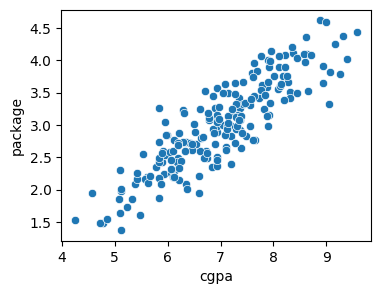

In [4]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.show

In [5]:
# important when we train a ml model the data will be 2 dimension
x = dataset["cgpa"]
x.ndim  # this show this is a 1 dimesion so we will convert into two dimension

1

In [6]:
x = dataset[["cgpa"]]
x.ndim

2

In [7]:
x = dataset[["cgpa"]]     # double brackets to make it a DataFrame
y = dataset["package"]    # single bracket for a Series


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
# applying linera regression to make our ml model 
from sklearn.linear_model import LinearRegression

In [10]:
# this is our training processs 
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# y = m*x+c

In [12]:
lr.coef_ # this the value of m  that is +ve its mean its angle formed between 0 to 90 degree 

array([0.57425647])

In [13]:
lr.intercept_   # this the value of c its mean intercept

-1.0270069374542108

In [14]:
# find the accuracy 
lr.score(x_test,y_test)*100 # it will give me 77 % accuracy 

77.30984312051673

In [15]:
#6.89	3.26

In [16]:
# applying testing our model 
lr.predict([[6.89]])

C:\Users\salman\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

In [17]:
0.57425647*6.89+-1.0270069374542108

2.929620140845789

In [18]:
y_prd = lr.predict(x)

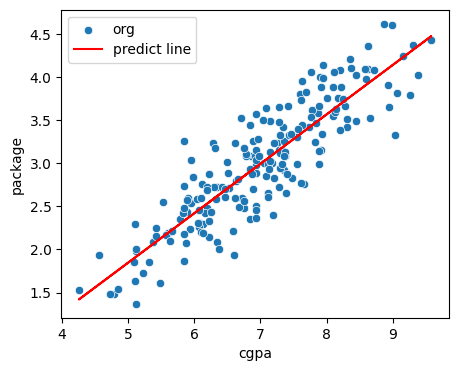

In [19]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x="cgpa", y="package", data=dataset, label="org")
plt.plot(dataset["cgpa"], y_prd, c="r", label="predict line")
plt.legend()

# Save the graph to your device
plt.savefig("cgpa_vs_package.png", dpi=300)  # You can change the filename and format

plt.show()


## 2 Multiple  Linear regression example 1

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [22]:
dataset2 = pd.read_csv("multiple_linear_regression_dataset.csv")
dataset2.head(5)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [23]:
dataset2.shape

(20, 3)

In [24]:
dataset2.isnull().sum()

age           0
experience    0
income        0
dtype: int64

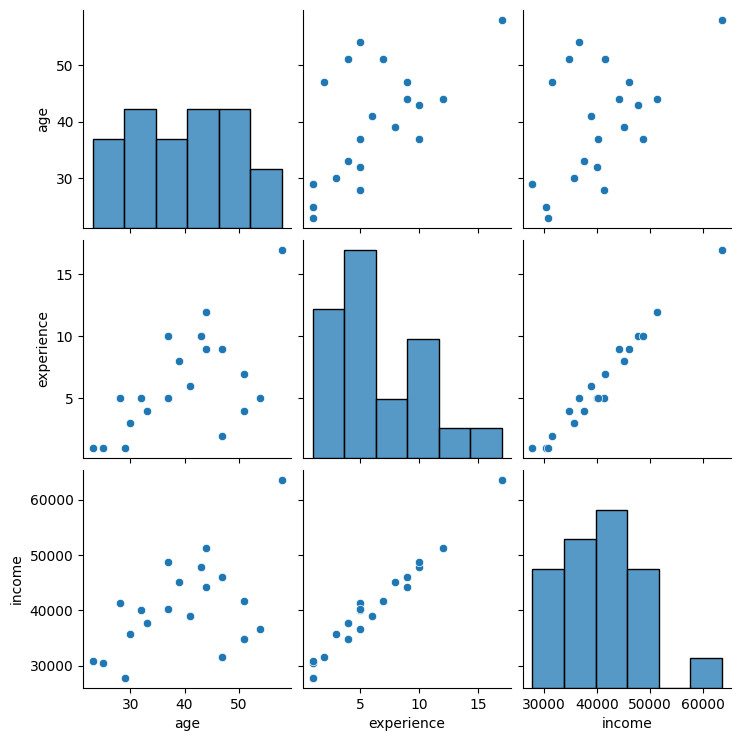

In [25]:
sns.pairplot(data=dataset2)
plt.show()

In [28]:
x = dataset2.iloc[:,:-1]
y = dataset2["income"]


In [33]:
x.ndim

2

In [31]:
# train test splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
lr.score(x_test,y_test)

0.9387098237077887

In [40]:
lr.score(x_train,y_train)

0.9741213876189155

In [41]:
lr.coef_

array([-101.0592335 , 2154.80549277])

In [42]:
lr.intercept_

31465.056418503933

In [ ]:
# y_pred = 101.0592335 *age + 2154.80549277*experience + 31465.056418503933

In [43]:
x.columns

Index(['age', 'experience'], dtype='object')

In [44]:
lr.predict(x_test)

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

In [ ]:
 ####Multiple regression example 2 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [29]:
dataset1 = pd.read_csv("F:/Study/Wscube-tech/Machine-learning/Datasets/economic_index.csv")
dataset1.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [34]:
#drop unneccessary columns
dataset1.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [35]:
dataset1.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [36]:
dataset1.shape

(24, 3)

In [37]:
dataset1.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

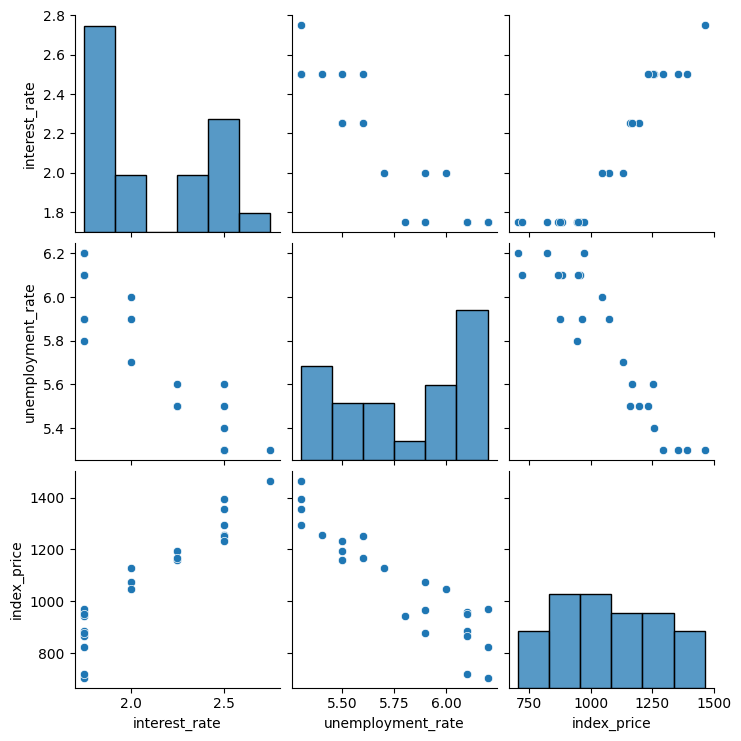

In [39]:
#plt.figure(figsize=(4,3))
sns.pairplot(data=dataset1)
plt.show

In [40]:
dataset1.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

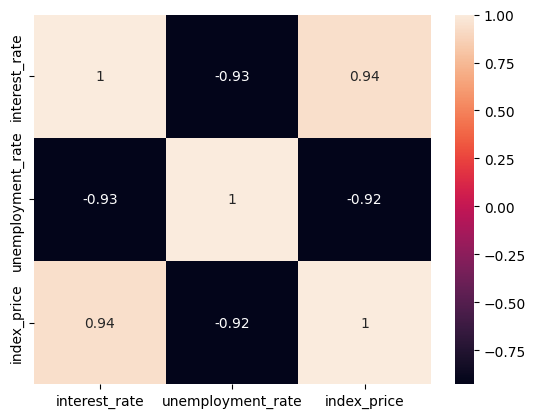

In [41]:
sns.heatmap(data=dataset1.corr(),annot=True)
plt.show

In [47]:
x  = dataset1.iloc[:,:-1]
y = dataset1.iloc[:,-1]


In [48]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [49]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [51]:
# train test splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

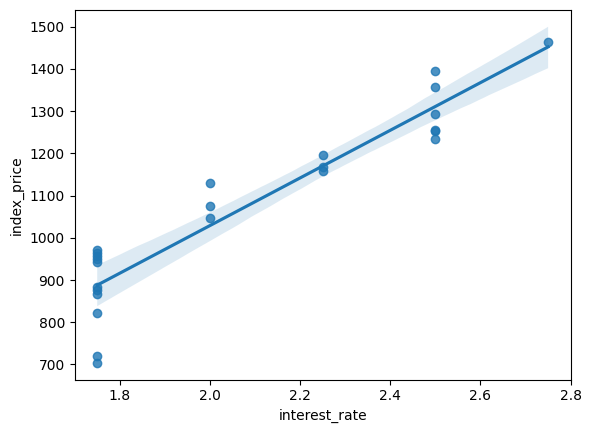

In [57]:
sns.regplot(x='interest_rate', y='index_price', data=dataset1)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

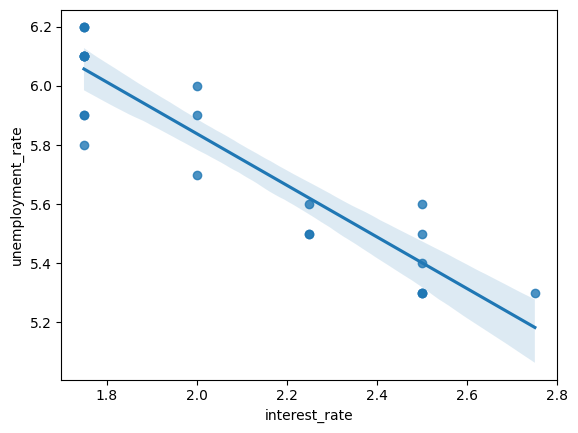

In [58]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=dataset1)


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

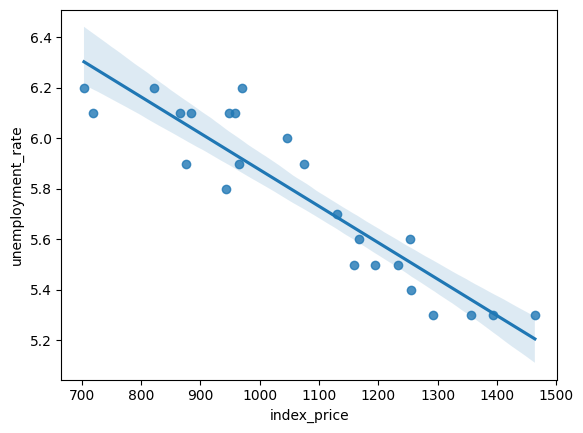

In [59]:
sns.regplot(x='index_price', y='unemployment_rate', data=dataset1)


In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [63]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.score(x_test,y_test)*100 # 75 % accuracy 

75.91371539010257

In [69]:
lr.coef_

array([  88.27275507, -116.25716066])

In [70]:
lr.intercept_

1053.4444444444443

In [71]:
# y_pred = 88.27275507*interest_rate -116.25716066*unemployment_rate + 1053.4444444444443

In [72]:
x.columns

Index(['interest_rate', 'unemployment_rate'], dtype='object')

In [73]:
lr.predict(x_test)

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [78]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [82]:
## prediction
y_pred=lr.predict(x_test)

In [83]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

## 3. Polynomial regression 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
dataset22 = pd.read_csv('Position_Salaries.csv')
X = dataset22.iloc[:, 1:-1].values
y = dataset22.iloc[:, -1].values

In [51]:
dataset22.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [52]:
#drop unneccessary columns
dataset22.drop(columns=["Position"], inplace=True)


In [53]:
dataset22.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [54]:
dataset22.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<Axes: xlabel='Level', ylabel='Salary'>

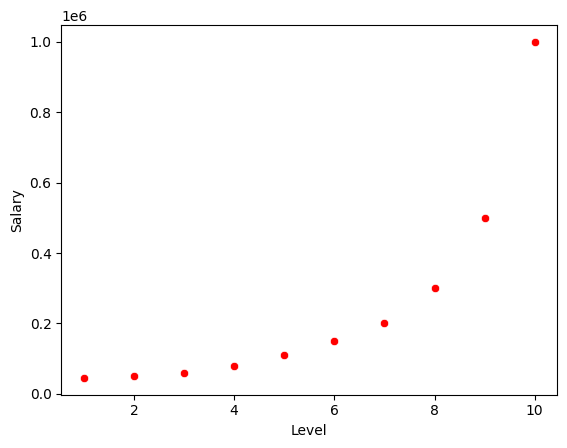

In [56]:
sns.scatterplot(x="Level",y="Salary",data=dataset22,c="r")

In [58]:
x = dataset22[["Level"]]
y = dataset22["Salary"]

## Training the Polynomial Regression model on the whole dataset

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pf = PolynomialFeatures(degree=4)

In [61]:
pf.fit(x)
x = pf.transform(x)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Training the Linear Regression model on the whole dataset

In [64]:
from sklearn.linear_model import LinearRegression 

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
lr.score(x_test,y_test) # accuracy 

0.9714666803843249

In [67]:
pred =  lr.predict(x)

## Visualising the Linear Regression results

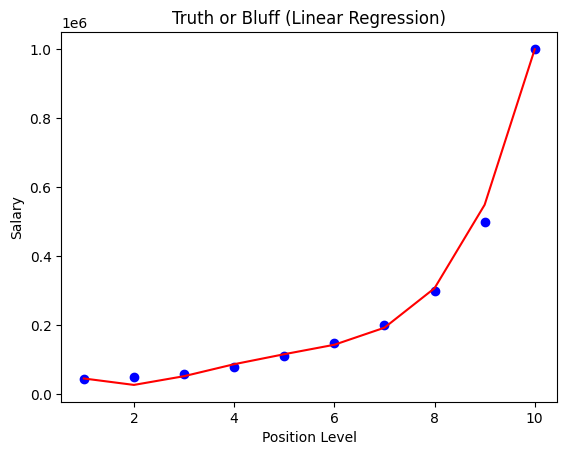

In [113]:
plt.scatter(dataset22['Level'], dataset22['Salary'], color='blue', marker='o')
plt.plot(dataset22["Level"],pred,c="red")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [68]:
test = pf.transform([[4]])
test

C:\Users\salman\anaconda3\envs\env_python388\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,   4.,  16.,  64., 256.]])

In [69]:
lr.predict(test)

array([87298.10162491])